In [8]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd

In [2]:
smi_file = "../data/derived/test.smi"

In [3]:
smiles = []
ind_names = []
smiles_dict = {}
with open(smi_file, 'r') as iFile:
    for i, s in enumerate(iFile):
        S = s.strip().split()
        smiles.append([S[0], i])
        ind_names.append(S[1])
        smiles_dict[S[1]] = S[0]

In [4]:
print(len(smiles_dict), len(smiles))

30307 30307


In [5]:
all_mols = []
for i in list(smiles_dict):
    m = Chem.MolFromSmiles(smiles_dict[i])
    m.SetProp("_Name",i)
    all_mols.append(m)

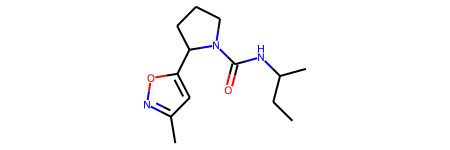

In [6]:
# m = Chem.MolFromSmiles('C1OCCC1c1c(Br)nc(O)cc1CC(=O)OCc1cnoc1')
m

In [7]:
descriptor_names = list(rdMolDescriptors.Properties.GetAvailableProperties())

get_descriptors = rdMolDescriptors.Properties(descriptor_names)

NameError: name 'rdMolDescriptors' is not defined

In [99]:
df = pd.DataFrame({'Id':list(smiles_dict)})

In [100]:
df.shape

(30307, 1)

In [101]:
sub_mat = []

for i, smart in enumerate(substr_list):
    sub_id = f'sma_{i}'
    sub_col = []
    for m in all_mols:
            bis = m.GetSubstructMatches(Chem.MolFromSmarts(smart))
            sub_col.append(len(bis))
    df[sub_id] = np.array(sub_col)



In [102]:
df.shape

(30307, 28)

In [103]:
df.to_csv('test_substr.csv', index=False)